# 1. Import thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\LEGION\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LEGION\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# 2. Collecting data

## 2.1 What subject is your data about? What is the source of your data?

**Subject:** Nói về các cuốn sách được đọc nhiều trong năm 2021<br>
**Source:** https://www.kaggle.com/datasets/shashwatwork/best-book-ever-data-for-2021/data

## 2.2 Do authors of this data allow you to use like this? You can check the data license

- **Chia sẻ** - sao chép và phân phối lại dataset ở bất kỳ phương tiện hoặc định dạng nào
- **Thích ứng** - phối lại, biến đổi và xây dựng dựa trên dataset

## 2.3 How did authors collect data?

Dataset đã được thu thập trong khung Prac1 của chủ đề Tipology and Data Life Cycle của Bằng Thạc sĩ Khoa học dữ liệu của Đại học Oberta de Catalunya (UOC).

# 3. Exploring data

In [2]:
df = pd.read_csv("books_1.Best_Books_Ever.csv")
df.head(10)

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1
5,19063.The_Book_Thief,The Book Thief,NaN,Markus Zusak (Goodreads Author),4.37,Librarian's note: An alternate cover edition c...,English,9780375831003,"['Historical Fiction', 'Fiction', 'Young Adult...","['Liesel Meminger', 'Hans Hubermann', 'Rudy St...",...,09/01/05,['National Jewish Book Award for Children’s an...,1834276,"['1048230', '524674', '186297', '48864', '26211']",96.0,"['Molching (Germany)', 'Germany']",https://i.gr-assets.com/images/S/compressed.ph...,1372809,14168,3.8
6,170448.Animal_Farm,Animal Farm,NaN,"George Orwell, Russell Baker (Preface), C.M. W...",3.95,Librarian's note: There is an Alternate Cover ...,English,9780451526342,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...","['Snowball', 'Napoleon', 'Clover', 'Boxer', 'O...",...,08/17/45,"['Prometheus Hall of Fame Award (2011)', 'Retr...",2740713,"['986764', '958699', '545475', '165093', '84682']",91.0,"['England', 'United Kingdom']",https://i.gr-assets.com/images/S/compressed.ph...,1276599,13264,4.42
7,11127.The_Chronicles_of_Narnia,The Chronicles of Narnia,The Chronicles of Narnia (Publication Order) #1–7,"C.S. Lewis, Pauline Baynes (Illustrator)",4.26,"Journeys to the end of the world, fantastic cr...",English,9999999999999,"['Fantasy', 'Classics', 'Fiction', 'Youn

## 3.1 How many rows and how many columns?

In [3]:
n_rows = df.shape[0]
n_cols = df.shape[1]
print("Number of rows: ",n_rows)
print("Number of columns: ",n_cols)

Number of rows:  52478
Number of columns:  25


## 3.2 What is the meaning of each row?

Mỗi dòng trong dataset sẽ đại diện cho một cuốn sách, phân biệt bằng thuộc tính "bookId", chứa những thuộc tính bao gồm thông tin của cuốn sách đó bao gồm tên sách, tác giả, thể loại,...

## 3.3 Are there duplicated rows?

In [4]:
def check_duplicated(df):
    if (sum(df.duplicated()) > 0):
        print("There are duplicated rows, number of duplicated rows: ",sum(df.duplicated()))
    else:
        print("There is no duplicated row.")

check_duplicated(df)

There are duplicated rows, number of duplicated rows:  50


In [5]:
#remove duplicated rows
df = df.drop(["price"],axis=1)
df = df.drop_duplicates()
check_duplicated(df)

There is no duplicated row.


## 3.4 What is the meaning of each column?

- bookId: Định danh của sách trên goodreads.com
- title: Tiêu đề sách
- series: Tên thứ tự sách trong một chuỗi loạt sách
- author: Tác giả của sách
- rating: Điểm đánh giá toàn cầu trên Goodreads
- description: Mô tả về sách
- language: Ngôn ngữ của sách
- isbn: Số ISBN của sách
- genres: Thể loại của sách
- characters: Nhân vật chính trong sách
- bookFormat: Loại bìa sách
- edition: Loại bản sách (ví dụ: Bản kỷ niệm)
- pages: Số trang của sách
- publisher: Nhà xuất bản
- publishDate: Ngày xuất bản
- firstPublishDate: Ngày xuất bản của bản đầu tiên
- awards: Danh sách các giải thưởng
- numRatings: Tổng số lượt đánh giá
- ratingsByStars: Số lượt đánh giá từng theo sao
- likedPercent: Phần trăm số lượt đánh giá từ 2 sao trở lên (như trên Goodreads)
- setting: Bối cảnh của câu chuyện
- coverImg: Đường link đến hình ảnh bìa sách
- bbeScore: Điểm trong danh sách "Best Books Ever"
- bbeVotes: Số phiếu bầu trong danh sách "Best Books Ever"
- price: Giá sách (trích xuất từ Iberlibro)


## 3.5 What is the current data type of each column? Are there columns having inappropriate data types?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52424 entries, 0 to 52477
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bookId            52424 non-null  object 
 1   title             52424 non-null  object 
 2   series            23442 non-null  object 
 3   author            52424 non-null  object 
 4   rating            52424 non-null  float64
 5   description       51088 non-null  object 
 6   language          48623 non-null  object 
 7   isbn              52424 non-null  object 
 8   genres            52424 non-null  object 
 9   characters        52424 non-null  object 
 10  bookFormat        50951 non-null  object 
 11  edition           4949 non-null   object 
 12  pages             50081 non-null  object 
 13  publisher         48732 non-null  object 
 14  publishDate       51545 non-null  object 
 15  firstPublishDate  31122 non-null  object 
 16  awards            52424 non-null  object 
 17

Có, các cột bị sai kiểu dữ liệu chẳng hạn như: 
- pages: object thay vì numeric.
- publishDate: object thay vì datetime object.
- firstPublishDate: object thay vì datetime object.
- ratingsByStars: là dạng string list của số lượt đánh giá theo từng sao, ta sẽ chia thành 5 cột.
- setting: dạng string list chuyển sang list
- genres: dạng string list chuyển sang list

In [7]:
#Fix data type
df["pages"] = pd.to_numeric(df["pages"], errors='coerce')

In [8]:
date_formats = [
    '%m/%d/%y', '%B %dth %Y', '%B %dst %Y', '%B %dnd %Y', '%B %drd %Y', 'Y', '%B %Y'
]
def convert_to_date(date_str):
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            pass
    return pd.NaT

df['publishDate'] = df['publishDate'].apply(convert_to_date)
df['firstPublishDate'] = df['firstPublishDate'].apply(convert_to_date)

In [9]:
df['publishDate']

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2006-09-06
           ...    
52473   2011-05-28
52474   2011-08-05
52475   2011-03-18
52476   2011-09-01
52477   2011-05-08
Name: publishDate, Length: 52424, dtype: datetime64[ns]

In [10]:
df['awards']

0        ['Locus Award Nominee for Best Young Adult Boo...
1        ['Bram Stoker Award for Works for Young Reader...
2        ['Pulitzer Prize for Fiction (1961)', 'Audie A...
3                                                       []
4        ['Georgia Peach Book Award (2007)', 'Buxtehude...
                               ...                        
52473                                                   []
52474                                                   []
52475              ["Readers' Favorite Book Award (2011)"]
52476                                                   []
52477                                                   []
Name: awards, Length: 52424, dtype: object

In [11]:
def convert_to_list(x):
    return x[1:-1].replace("'","").split(', ')

In [12]:
df['awards'] = df['awards'].apply(lambda x: convert_to_list(x))
df['awards'] = df['awards'].apply(lambda x: [y.replace('"',"") for y in x])

In [13]:
df['ratingsByStars'] = df['ratingsByStars'].apply(lambda x: convert_to_list(x))
df['ratingsByStars'] = df['ratingsByStars'].apply(lambda x : [int(y) for y in x if y.isdigit()])

In [14]:
df['setting'] = df['setting'].apply(lambda x: convert_to_list(x))

In [15]:
df['genres'] = df['genres'].apply(lambda x: convert_to_list(x))

In [16]:
df[['1_star', '2_star', '3_star', '4_star', '5_star']] = df['ratingsByStars'].apply(pd.Series)

In [17]:
df['1_star']

0        3444695.0
1        1593642.0
2        2363896.0
3        1617567.0
4        1751460.0
           ...    
52473        311.0
52474         16.0
52475       2109.0
52476         77.0
52477        106.0
Name: 1_star, Length: 52424, dtype: float64

In [18]:
df = df.drop(['ratingsByStars'],axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52424 entries, 0 to 52477
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bookId            52424 non-null  object        
 1   title             52424 non-null  object        
 2   series            23442 non-null  object        
 3   author            52424 non-null  object        
 4   rating            52424 non-null  float64       
 5   description       51088 non-null  object        
 6   language          48623 non-null  object        
 7   isbn              52424 non-null  object        
 8   genres            52424 non-null  object        
 9   characters        52424 non-null  object        
 10  bookFormat        50951 non-null  object        
 11  edition           4949 non-null   object        
 12  pages             50058 non-null  float64       
 13  publisher         48732 non-null  object        
 14  publishDate       45601 non

**Cột "pages" có giá trị float thay vì int vì có cột này chứa missing value, pandas sử dụng numpy để xử lý nên numpy hiểu các missing value (NaN) dạng float.**

## 3.6 With each numerical column, how are values distributed?

In [20]:
df.describe()

,rating,pages,publishDate,firstPublishDate,numRatings,likedPercent,bbeScore,bbeVotes,1_star,2_star,3_star,4_star,5_star
count,52424.000000,50058.000000,45601,30087,5.242400e+04,51803.000000,5.242400e+04,52424.000000,5.100200e+04,5.100200e+04,5.100200e+04,51002.000000,51002.000000
mean,4.021885,328.694914,2007-04-09 08:19:26.500734720,2007-12-10 17:53:48.836374528,1.789390e+04,92.232342,1.985977e+03,22.551160,7.491308e+03,6.147979e+03,3.411939e+03,928.502059,412.809655
min,0.000000,0.000000,1820-10-01 00:00:00,1722-03-01 00:00:00,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.820000,210.000000,2003-05-10 00:00:00,1996-08-01 00:00:00,3.410000e+02,90.000000,8.400000e+01,1.000000,1.460000e+02,1.340000e+02,7.800000e+01,19.000000,7.000000
50%,4.030000,304.000000,2009-04-28 00:00:00,2006-10-01 00:00:00,2.310500e+03,94.000000,9.700000e+01,1.000000,8.840000e+02,8.340000e+02,4.900000e+02,117.000000,39.000000
75%,4.230000,392.000000,2013-08-01 00:00:00,2013-02-08 12:00:00,9.389500e+03,96.000000,1.870000e+02,2.000000,3.568000e+03,3.375000e+03,1.958000e+03,475.000000,163.000000
max,5.000000,14777.000000,2064-10-07 00:00:00,2068-12-31 00:00:00,7.048471e+06,100.000000,2.993816e+06,30516.000000,4.578137e+06,1.921313e+06,1.008686e+06,542017.000000,548674.000000
std,0.367103,252.261672,NaN,NaN,1.039971e+05,5.988173,3.517119e+04,369.347978,5.144423e+04,3.206776e+04,1.720394e+04,5660.129821,3766.002518


In [21]:
numerical_df = df.select_dtypes(include=np.number)
numerical_df

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,1_star,2_star,3_star,4_star,5_star
0,4.33,374.0,6376780,96.0,2993816,30516,3444695.0,1921313.0,745221.0,171994.0,93557.0
1,4.50,870.0,2507623,98.0,2632233,26923,1593642.0,637516.0,222366.0,39573.0,14526.0
2,4.28,324.0,4501075,95.0,2269402,23328,2363896.0,1333153.0,573280.0,149952.0,80794.0
3,4.26,279.0,2998241,94.0,1983116,20452,1617567.0,816659.0,373311.0,113934.0,76770.0
4,3.60,501.0,4964519,78.0,1459448,14874,1751460.0,1113682.0,1008686.0,542017.0,548674.0
...,...,...,...,...,...,...,...,...,...,...,...
52473,4.00,0.0,871,94.0,0,1,311.0,310.0,197.0,42.0,11.0
52474,4.19,190.0,37,95.0,0,1,16.0,14.0,5.0,2.0,0.0
52475,3.70,280.0,6674,84.0,0,1,2109.0,1868.0,1660.0,647.0,390.0
52476,3.85,507.0,238,90.0,0,1,77.0,78.0,59.0,19.0,5.0


### 3.6.1 What is the percentage of missing values?

In [22]:
def missing_ratio(input):
    return (input.isnull().sum() / len(input) * 100).round(1)


df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,1_star,2_star,3_star,4_star,5_star
missing_ratio,0.0,4.5,0.0,1.2,0.0,0.0,2.7,2.7,2.7,2.7,2.7


### 3.6.2 Min? max? Are they abnormal?

In [23]:
df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg(["min", "max"])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,1_star,2_star,3_star,4_star,5_star
min,0.0,0.0,0,0.0,0,-4,0.0,0.0,0.0,0.0,0.0
max,5.0,14777.0,7048471,100.0,2993816,30516,4578137.0,1921313.0,1008686.0,542017.0,548674.0


Có vẻ như trong các cột dữ liệu dạng số, cột "bbeVotes" bất thường vì min của cột này là -4, trong khi cột này thể số phiếu bầu trong danh sách "Best Books Ever", nghĩa là luôn không âm. Các cột còn lại đều đúng và thỏa mãn.

In [24]:
#Fix "bbeVotes"
df.loc[df["bbeVotes"] < 0, "bbeVotes"] = 0

In [25]:
df_describe = df.select_dtypes(include=np.number)
df_describe = df_describe.agg(["min", "max"])
df_describe

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,1_star,2_star,3_star,4_star,5_star
min,0.0,0.0,0,0.0,0,0,0.0,0.0,0.0,0.0,0.0
max,5.0,14777.0,7048471,100.0,2993816,30516,4578137.0,1921313.0,1008686.0,542017.0,548674.0


## 3.7 With each categorical column, how are values distributed?

In [276]:
unique_genres = []
for sublist in df['genres']:
    for genre in sublist:
        if genre not in unique_genres:
            unique_genres.append(genre)
unique_genres

['Young Adult',
 'Fiction',
 'Dystopia',
 'Fantasy',
 'Science Fiction',
 'Romance',
 'Adventure',
 'Teen',
 'Post Apocalyptic',
 'Action',
 'Magic',
 'Childrens',
 'Audiobook',
 'Middle Grade',
 'Classics',
 'Science Fiction Fantasy',
 'Historical Fiction',
 'School',
 'Literature',
 'Historical',
 'Novels',
 'Read For School',
 'High School',
 'Historical Romance',
 'Classic Literature',
 'Adult',
 'Vampires',
 'Paranormal',
 'Paranormal Romance',
 'Supernatural',
 'Urban Fantasy',
 'War',
 'Holocaust',
 'World War II',
 'Books About Books',
 'Politics',
 'Christian',
 'Christian Fiction',
 'Epic Fantasy',
 'High Fantasy',
 'Civil War',
 'Contemporary',
 'Realistic Fiction',
 'Coming Of Age',
 'Drama',
 'Love',
 'Humor',
 'Comedy',
 'Picture Books',
 'Poetry',
 'Juvenile',
 'Kids',
 'Short Stories',
 'Gothic',
 '19th Century',
 'Mystery',
 'Thriller',
 'Suspense',
 'Mystery Thriller',
 'Crime',
 'Japan',
 'Asia',
 'Adult Fiction',
 'Horror',
 'LGBT',
 'British Literature',
 'France',

### 3.7.1 What is the percentage of missing values?

In [278]:
df_describe = df.select_dtypes(exclude=np.number)
df_describe = df_describe.agg([missing_ratio])
df_describe

,bookId,title,series,author,description,language,isbn,genres,characters,bookFormat,edition,publisher,publishDate,firstPublishDate,awards,setting,coverImg
missing_ratio,0.0,0.0,55.3,0.0,2.5,7.3,0.0,0.0,0.0,2.8,90.6,7.0,13.0,42.6,0.0,0.0,1.2


edition có nhiều giá trị missing value (> 90%) ta nên drop cột đó.

In [279]:
df = df.drop(['edition'],axis=1)

### 3.7.2 How many different values? Show a few

Có cột "genres" bất thường vì genres là chuỗi các thể loại của 1 cuốn sách, mà ta không thể sử dụng pd.get_dummies() để cột "genres" thành nhiều genre được vì số "genres" rất lớn (983).

### 3.7.3 Are they abnormal?

# 4. Asking meaningful questions

## 4.1 Question 1

**What is the question?**

**What are benefits of finding the answer?**

## 4.2 Question 2

**What is the question?**

**What are benefits of finding the answer?**

## 4.3 Question 3

**Question:** Cách để xây dựng hệ thống khuyến nghị 10 cuốn sách dựa trên thể loại và ratings của một cuốn sách?

**Benefits of finding the answer:** 
- Giúp người đọc khám phá những cuốn sách mới vừa có nhiều điểm tương đồng so với cuốn sách mà người đó thích, vừa có ratings trung bình cao.
- Tăng trải nghiệm đọc sách

# 5. Preprocessing + analyzing data to answer each question

## 5.1 Question 1

### 5.1.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

**Text**

**Code**

### 5.1.2 How does your group analyze data to answer the question?

**Text**

**Code**

## 5.2 Question 2

### 5.2.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

**Text**

**Code**

### 5.2.2 How does your group analyze data to answer the question?

**Text**

**Code**

## 5.3 Question 3

### 5.3.1 Does it need to have preprocessing step, and if yes, how does your group preprocess?

Để thực hiện câu hỏi này, ta cần thiết lập ma trận TF-IDF dựa trên các thể loại.<br>
Trước khi đi vào bước tiền xử lí dữ liệu, em sẽ giải thích định nghĩa về TF-IDF: là một thước đo thống kê đánh giá mức độ quan trọng của một từ với một tài liệu trong bộ sưu tập tài liệu.<br>
**Các bước:**
- Xây dựng ma trận với với số dòng tương ứng với số lượng sách và số cột tương ứng với số từ được tách ra từ "genres"
- Tính ma trận TF-IDF

Xây dựng ma trận với với số dòng tương ứng với số lượng sách và số cột tương ứng với số từ được tách ra từ "genres"

In [26]:
one_hot_df = pd.get_dummies(df['genres'].apply(pd.Series).stack()).groupby(level=0).sum()
one_hot_df.index = df['title'].values

Tính ma trận TF-IDF 

In [20]:
tfidf_transformer = TfidfTransformer()
tfidf_matrix = tfidf_transformer.fit_transform(one_hot_df)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=one_hot_df.columns, index = one_hot_df.index)

### 5.3.2 How does your group analyze data to answer the question?

- Em sẽ lọc ra những cuốn sách có ratings $\geq$ 4.5 để nâng cao chất lượng của hệ thống gợi ý.
- Em sử dụng độ tương tự cosine để tính toán một đại lượng số biểu thị sự giống nhau giữa tất cả cuốn sách với các cuốn sách có ratings $\geq$ 4.5

**Chú ý:** Tuy nhiên, vì lượng dữ liệu lớn nên việc lưu trữ và tính toán độ tương đồng giữa các cuốn sách cùng một lúc là không khả thi vì nó có thể dẫn đến các vấn đề về bộ nhớ. Cho nên em đề xuất một giải pháp là sử dụng batch_size, nghĩa là ở mỗi bước, ta sẽ tính toán độ tương đồng giữa các các cuốn sách trong batch_size với toàn bộ dataset và lưu trữ trên ma trận (batch_size,m)(Với m là số lượng sách có ratings lớn hơn 4.5).

**Khởi tạo batch_size = 128**

In [21]:
batch_size = 256
start = 0
end = batch_size

**Lọc ra những cuốn sách có ratings $\geq$ 4.5**

In [22]:
df_ratings = df[df['rating']>=4.5]
tfidf_ratings_df = tfidf_df[(df['rating']>=4.5).values]

**Tính toán cosine similarity**

In [23]:
num_epoch = df.shape[0]//batch_size + 1
cosine_sim_dict = {}
for i in range(num_epoch):
    cosine_sim_df = cosine_similarity(tfidf_df[start:end], tfidf_ratings_df)
    cosine_sim_batch = pd.DataFrame(cosine_sim_df, index=one_hot_df.index[start:end], columns=tfidf_ratings_df.index)
    cosine_sim_dict[i] = cosine_sim_batch
    start += batch_size
    end += batch_size

**Xây dựng hệ thống gợi ý**

In [24]:
def Content_based_RS(cosine_sim_dict, book_title,n):
    idx = df[df['title'] == book_title].index[0]
    i = idx // batch_size
    result = cosine_sim_dict[i][cosine_sim_dict[i].index == book_title].squeeze().nlargest(n)
    name, score = result.index, result.values
    return name, score

In [28]:
book_title = 'Daughter of Helaman'
n = 5
name, score = Content_based_RS(cosine_sim_dict,'Daughter of Helaman',n)
top_n_book = pd.DataFrame([name,score], index = ['Title','Cosine Similarity']).transpose()

In [29]:
top_n_book

,Title,Cosine Similarity
0,The Work and the Glory 9 volumes,0.780869
1,Fire of the Covenant: The Story of the Willie ...,0.610162
2,The Sweet Evil Complete Collection: Sweet Evil...,0.384335
3,Fablehaven; Rise of the Evening Star; Grip of ...,0.366466
4,Seasons of Love and War,0.364192


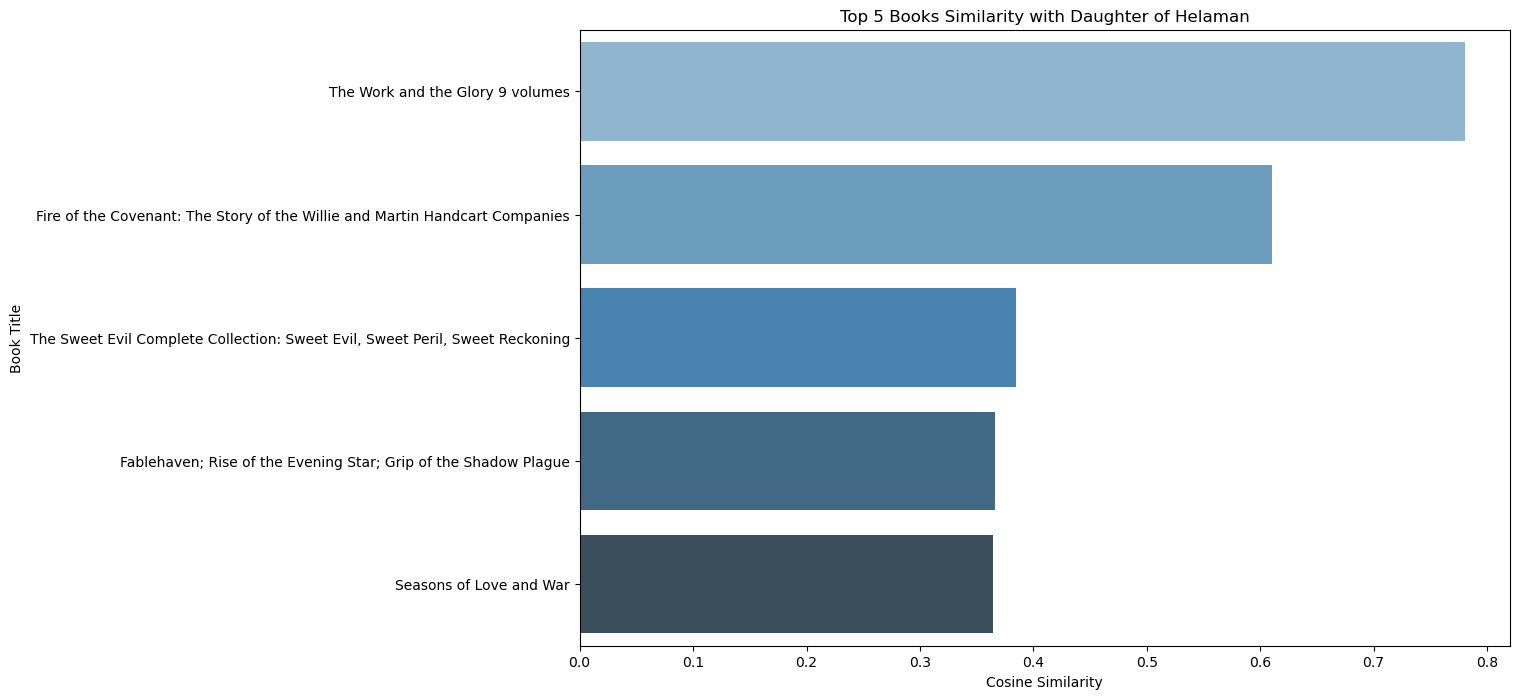

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Cosine Similarity', y='Title', data=top_n_book, palette='Blues_d')
plt.title(f'Top {n} Books Similarity with {book_title}')
plt.xlabel('Cosine Similarity')
plt.ylabel('Book Title')
plt.show()

# 6. Reflection